In [1]:
from manim import *
from numpy import linalg as npl
import math
import matplotlib.pyplot as plt
import jupyter_capture_output

video_scene = " -v WARNING --progress_bar None --disable_caching spring_Scene"
image_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s spring_Scene"

Manim Community v0.17.3

Jupyter Capture Output v0.0.8


Output saved by creating file at animations/spring/spring.mp4.


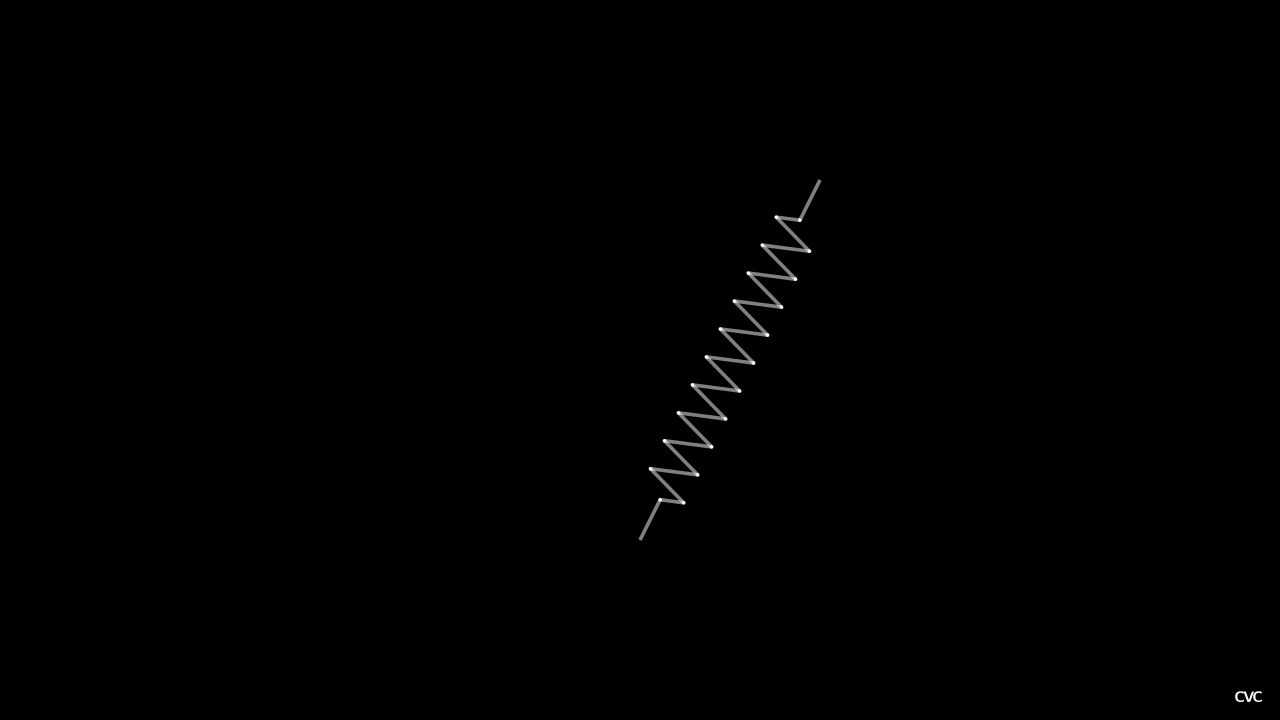

In [52]:
%%capture_video --path "animations/spring/spring.mp4"
%%manim -qm --fps 60 $video_scene


def Spring(start = UP, end = DOWN, tip_buff = 0.25, nodes = 20, k = 0.5):
    spring_group = VGroup()
    start[2], end[2] = 0, 0

    # Extended Parameters
    direction = (end - start) / npl.norm(end - start)
    anti_direction = np.array([direction[1], -direction[0], direction[2]])
    eff_start = start + tip_buff*direction
    eff_end = end - tip_buff*direction
    eff_length = npl.norm(eff_end - eff_start)

    node_length = eff_length / nodes
    node_deviance = k


    # Hinzufügen einer Linie mit gegebenem Start- 'l_start' und Endpunkt 'l_end'
    def spring_add_line(l_start, l_end):
        spring_group.add(Line(l_start, l_end, color = WHITE, stroke_width = 4, stroke_opacity = 0.5))
    
    # Hinzufügen eines Punktes mit gegebener Koordinate 'pos'
    def spring_add_dot(d_pos):
        spring_group.add(Dot(d_pos, color = WHITE, radius = 0.02))


    # Objects
    spring_add_line(start, eff_start)               # start linie
    spring_add_line(eff_end, end)                   # end line
    spring_add_dot(eff_start)                       # start dot
    spring_add_dot(eff_end)                         # end dot

    spring_add_line(eff_start, eff_start + direction * node_length / 2 + anti_direction * node_deviance / 2)                                # first line
    spring_add_dot(eff_start + direction * node_length / 2 + anti_direction * node_deviance / 2)                                            # first dot
    spring_add_line(eff_start + direction * (nodes - 1/2) * node_length + (-1)**(nodes+1) * anti_direction * node_deviance / 2, eff_end)    # last line

    for i in range(1, nodes):
        spring_add_line(eff_start + direction * (i - 1/2) * node_length + (-1)**(i+1) * anti_direction * node_deviance / 2, eff_start + direction * (i + 1/2) * node_length + (-1)**(i) * anti_direction * node_deviance / 2)
        spring_add_dot(eff_start + direction * (i + 1/2) * node_length + (-1)**(i) * anti_direction * node_deviance / 2)

    return spring_group


class spring_Scene(Scene):
    def construct(self):
        CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC)

        cvc_spring_test = Spring(start = np.array([2, 2, 0]), end = np.array([0, -2, 0]), k = 0.5, tip_buff = 0.5, nodes = 20)
        self.add(cvc_spring_test)